In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

#Problem A
###Developing a synthetic dataset that captures what happened during geopolitical events that suddenly occurred at time $t_s$. 


###The function bellow performs a pransformation (the jump) on the already created data of prices without jumps. Notice that I have also created a variable 'y' that is assigned as zero for all datapoints without the jump and then I'm reasigning it to 1 to the point with the jump. This variable will keep the distinction between different types of prices ($x_s$ and $x_e$) which I will use in part B to reduce the number of computations. 

In [ ]:
def jump(x,y,t):
  for i in range(t, t+10):
    x[i]=2*x[i]
    y[i]=1


###Down bellow I am creating 3 variables: 
###1) t - the duration of the dataset (365 time units) 
###2) x - the prices of at the time units. Notice that for my standatrd diviation 'std' for the noise I take a square root of (0.2*50) because we are given that the variance is 20% of 50 and variance is also standart diviation squared. 
###3) y - an array of ones and seroz to keep distinction between $x_s$ and $x_e$

In [ ]:
t=np.linspace(1,365,365)
y=np.zeros(365)
x = np.zeros(365)


static_price =50 
std = math.sqrt(0.2*static_price)


for i in range(0, 365):
  x[i] = 50 + np.random.normal(0, std)


#first jump
t_1 = np.random.randint(355)
jump(x,y,t_1)

#second jump
t_2 = np.random.randint(355)
jump(x,y,t_2)


###I am ploting the visualization of the synthesized dataset. 
###Notice the 2 jumps happening arount time 150 and time 250

Text(0.5, 0, 'Time')

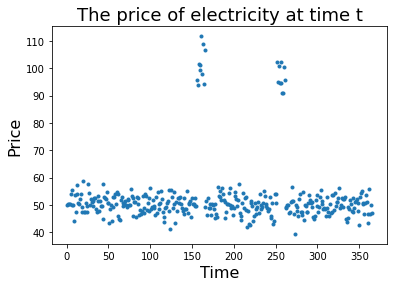

In [ ]:
plt.plot(t,x,'.')
plt.title("The price of electricity at time t", size=18)
plt.ylabel("Price", size=16)
plt.xlabel("Time", size=16)

#Problem B

###Down bellow is a recursive function that performs an algorithms of a single desision tree 
###Notice that I am not passing the actual sample into the tree function, insread I create a sample of indexes and pass it into the tree. Using those indexes I can get the samples for both x and y variables. 

The rest of the explanation is writen in the comments

In [ ]:
def tree(d,indexes, all_paths, splits):
  
  #create the sample arrays for x and y with the given inedexes 
  sample_x=[]
  sample_y=[]
  for i in indexes:
    sample_x.append(x[i])
    sample_y.append(y[i])
  
  #check for the boundary conditions for the recrusion 
  #if there is only one data point : save the number of edges and return
  if(len(indexes)<=1):
    for i in range(len(indexes)):
      all_paths[indexes[i]].append(d)
    return 
  #if there is only x_s prices but no x_e : save the number of edges and return
  if(0 in sample_y and 1 not in sample_y):
    for i in range(len(indexes)):
      all_paths[indexes[i]].append(d)
    return 
  #if there is only x_e prices but x_s : save the number of edges and return
  if(1 in sample_y and 0 not in sample_y):
    for i in range(len(indexes)):
      all_paths[indexes[i]].append(d)
    return


  #chose a random place between the max and the min to split the sample 
  xmax = max(sample_x)
  xmin = min(sample_x)
  split = (xmax-xmin)*np.random.random()+xmin 
  #save the split for the future prediction
  splits.append(split)

  #check for the boundary conditions for the recursion 
  #if we reached the maximum depth : save the number of edges and return
  if(d==D_max):
    for i in range(len(indexes)):
      all_paths[indexes[i]].append(d)
    return 


  #create 2 new samples for the above and bellow the split
  index_up =[]
  index_low = []
  for i in range(len(indexes)):
    if(sample_x[i]>split):
      index_up.append(indexes[i])
    else:
      index_low.append(indexes[i])
  
  
  #increment the current depth and run the recrusion 
  d=d+1
  tree(d,index_up,all_paths,splits)
  tree(d,index_low,all_paths,splits)

### Down bellow I wrote a function $\textbf{evaluate_forest}$ 
### Notice that the variable 'all_paths' is an array of array that stores the number of nodes each data point went trough. The index of the array of paths in 'all_paths' matches the index of the data point in x. (Thus the point 'x[0]' went through nades stored in array 'all_paths[0]')

The rest of explanation is in comments

In [ ]:
def evaluate_forest():
  
  
  #create an array of empty arrays [[],[]...[]]
  all_paths=[]
  for i in range(0, 365):
    all_paths.append([])



 
  #run the three function K times 
  for k in range(K):
    #keep track of all the splits to make a threshold prediction for the tree
    splits=[] 

    #create a sample for the tree
    sample_indexes = []
    for i in range(N):
      sample_indexes.append(np.random.randint(365))
    

    # every tree begins at depth 1, run the tree
    d=1
    tree(d,sample_indexes,all_paths,splits)
    
    #record the prediction of the threshold for the tree
    if(len(splits)>0):
      all_thresholds.append(sum(splits)/len(splits))
  
  
  #for each index/data_point average the amount of edges it went through in each tree and return the value
  average_paths=[]
  for i in range(0, 365):
    if(len(all_paths[i])>0):
      average_paths.append(sum(all_paths[i])/len(all_paths[i]))
    else:
      average_paths.append(0)
  return average_paths

## $\underline{Question}$ : What can you notice about the average path lengths of prices that correspond to price jumps events vs the rest ?

## $\underline{Answer}$ :
### The answer to the question is that if solving the given probelem the way I was asked to solve it I would get that $\textbf{the average path lengths of prices that correspond to price jumps events are lower than for the rest of the events}$. And I would be able to see the dip in the plot.

###However, I introduced the y variable to my code to optimize it and make it less computationaly expensive, therefore the $x_s$ data points don't travel through as many paths for no reason, instead my function recognizes that it's a waste of time and exits. 

###To emulate what my code would be doing without optimizing it with the y variable, I gan chose a very big sample size N that is bigger than the datase and a very small number of trees K.
Look at the graph bellow for N=5000 and K = 20, as you can see $x_s$ datapoints (at t around 150 and 250) on average have smaller paths.

The treshold that can best detect the price jump is 76.27


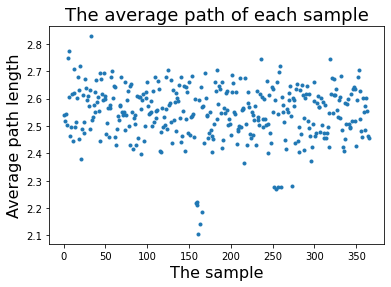

In [ ]:
N=5000
K=20
D_max=5


all_thresholds=[] #keeps track of each trees predictions

paths=evaluate_forest()

plt.plot(t,paths,'.')
plt.ylabel("Average path length", size=16)
plt.xlabel("The sample", size=16)
plt.title("The average path of each sample", size=18)
print("The treshold that can best detect the price jump is %.2f" %(sum(all_thresholds)/len(all_thresholds)))

###Notice that if I pick my N to be very small and K to be very large, I can get the opposite effect where my $x_e$ points have longer paths.

Look at the graph bellow for N=10 and K = 500

The treshold that can best detect the price jump is 75.75


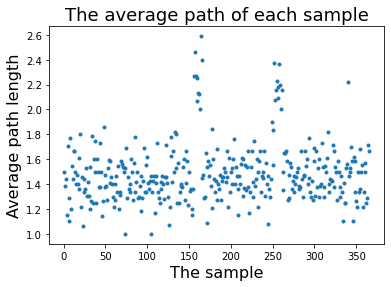

In [ ]:
N=10
K=500
D_max=5


all_thresholds=[] #keeps track of each trees predictions

paths=evaluate_forest()

plt.plot(t,paths,'.')
plt.ylabel("Average path length", size=16)
plt.xlabel("The sample", size=16)
plt.title("The average path of each sample", size=18)
print("The treshold that can best detect the price jump is %.2f" %(sum(all_thresholds)/len(all_thresholds)))

###Although those graphs look different, they yeild similar predictions for the threshold. Thus, we can pick both K and N to be small to reduce the computation cost and still get a good prediction. 

###Although the average paths graph doesn't look as good, the algorithm still works well at prediction the threshold and not as computationaly expensve.


The treshold that can best detect the price jump is 77.20


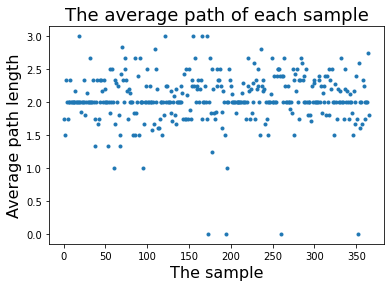

In [ ]:
N=40
K=40
D_max=5


all_thresholds=[] #keeps track of each trees predictions

paths=evaluate_forest()

plt.plot(t,paths,'.')
plt.ylabel("Average path length", size=16)
plt.xlabel("The sample", size=16)
plt.title("The average path of each sample", size=18)
print("The treshold that can best detect the price jump is %.2f" %(sum(all_thresholds)/len(all_thresholds)))

### Thus, I chose: $N$ = 40, $K$ = 40, $D_{max}$ = 5.
### This gave me the result of the throshold of $\textbf{77.20}$

#$\underline{Extra}$: $\textbf{Question B8}$

###To show that the average path plot would look like if I didn't use the y variable that I introduced, I will redifine the tree function to not have the y-variable boundary conditions and run the random forest again.  


In [ ]:
def tree(d,indexes, all_paths, splits):
  
  #create the sample arrays for x and y with the given inedexes 

  sample_x=[]
  sample_y=[]
  for i in indexes:
    sample_x.append(x[i])
    sample_y.append(y[i])
  
  #check for the boundary conditions for the recrusion 

  #if there is only one data point : save the number of edges and return
  if(len(indexes)<=1):
    for i in range(len(indexes)):
      all_paths[indexes[i]].append(d)
    return 



  #chose a random place between the max and the min to split the sample 
  xmax = max(sample_x)
  xmin = min(sample_x)
  split = (xmax-xmin)*np.random.random()+xmin 
  #save the split for the future prediction
  splits.append(split)

  #check for the boundary conditions for the recursion 
  #if we reached the maximum depth : save the number of edges and return
  if(d==D_max):
    for i in range(len(indexes)):
      all_paths[indexes[i]].append(d)
    return 


  #create 2 new samples for the above and bellow the split
  index_up =[]
  index_low = []
  for i in range(len(indexes)):
    if(sample_x[i]>split):
      index_up.append(indexes[i])
    else:
      index_low.append(indexes[i])
  
  
  #increment the current depth and run the recrusion 
  d=d+1
  tree(d,index_up,all_paths,splits)
  tree(d,index_low,all_paths,splits)

###Down bellow I ran a random forest that uses a desician tree without a y-variable. 
###I used  $N$ = 100, $K$ = 40, $D_{max}$ = 5
### Notice that as I said above, the average path length for $x_e$ data points is shorter than the rest of samples.
### The predicted threshold is 64.54 which is close to the previous ones but not as good.
### The algorithm with a y-variable is faster since is doesn't require as big of a sample size. And it doesn't use as many nodes in trees. (AKA smaller paths.) You can see that the averave path langht down bellow is 5 because its the $D_{max}$, while the average path length above is around 2.  

The treshold that can best detect the price jump is 64.54


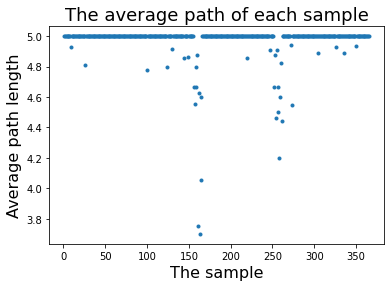

In [ ]:
N=100
K=40
D_max=5


all_thresholds=[] #keeps track of each trees predictions

paths=evaluate_forest()

plt.plot(t,paths,'.')
plt.ylabel("Average path length", size=16)
plt.xlabel("The sample", size=16)
plt.title("The average path of each sample", size=18)
print("The treshold that can best detect the price jump is %.2f" %(sum(all_thresholds)/len(all_thresholds)))